In [1]:
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "2024 Red List Changes.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

In [3]:
df.head()

,2024 Scientific name,2024 Common name,Africa,Americas,(Antarctic),Asia,Europe and Central Asia,Middle East,Pacific,Marine,New Red List Assessment,IUCN Red List Category change,Genuine change or revision?,2024.2 IUCN Red List category,Previous IUCN Red List category,Better or worse?,Taxonomic/ nomenclature change,Change type,Unnamed: 18
0,Nothocercus julius,Tawny-breasted Tinamou,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LC,LC,NaN,NaN,NaN,0
1,Crypturellus berlepschi,Berlepsch's Tinamou,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LC,LC,NaN,NaN,NaN,0
2,Crypturellus cinereus,Cinereous Tinamou,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LC,LC,NaN,NaN,NaN,0
3,Crypturellus undulatus,Undulated Tinamou,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LC,LC,NaN,NaN,NaN,0
4,Crypturellus strigulosus,Brazilian Tinamou,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LC,LC,NaN,NaN,NaN,0


In [4]:
print(df.columns)

Index(['2024 Scientific name', '2024 Common name', 'Africa', 'Americas',
       '(Antarctic)', 'Asia', 'Europe and Central Asia', 'Middle East',
       'Pacific', 'Marine', 'New Red List Assessment',
       'IUCN Red List Category change', 'Genuine change or revision?',
       '2024.2 IUCN Red List category', 'Previous IUCN Red List category',
       'Better or worse?', 'Taxonomic/ nomenclature change', 'Change type',
       'Unnamed: 18'],
      dtype='object')


## 1. Jumlah Spesies Per Wilayah

In [5]:
# List of region columns
regions = ['Africa', 'Americas', '(Antarctic)', 'Asia', 'Europe and Central Asia', 'Middle East', 'Pacific', 'Marine']

# Count the number of species per region where value is 'y' (indicating presence)
species_per_region = df[regions].apply(lambda col: col.str.lower().eq('y').sum()).sort_values(ascending=True)

# Display the result
species_per_region

Marine                        5
(Antarctic)                  17
Middle East                 204
Europe and Central Asia     215
Pacific                     800
Africa                     1263
Americas                   1565
Asia                       1685
dtype: int64

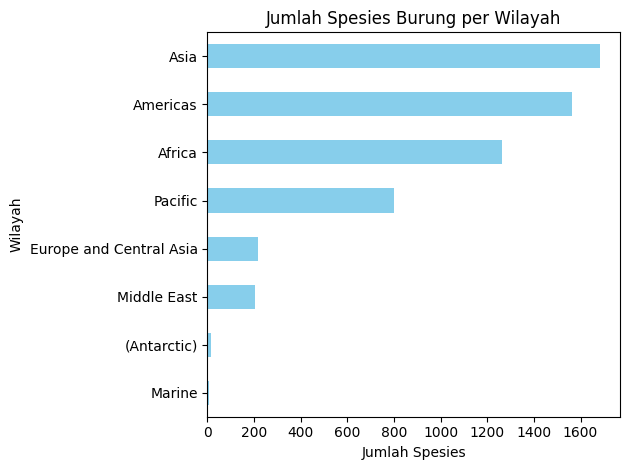

In [6]:
species_per_region.plot(kind='barh', color='skyblue')
plt.title('Jumlah Spesies Burung per Wilayah')
plt.xlabel('Jumlah Spesies')
plt.ylabel('Wilayah')
plt.tight_layout()
plt.show()

## 2. Distribusi Status Konservasi per Wilayah

In [7]:
# Ambil hanya baris dengan informasi kategori IUCN valid
valid_status_df = df[df['2024.2 IUCN Red List category'].notna()]

# Ubah semua ke lowercase 'y' untuk keseragaman, lalu filter per wilayah dan kategori
conservation_distribution = {}

for region in regions:
    mask = valid_status_df[region].str.lower() == 'y'
    counts = valid_status_df[mask]['2024.2 IUCN Red List category'].value_counts()
    conservation_distribution[region] = counts

# Gabungkan semua hasil jadi satu dataframe
conservation_df = pd.DataFrame(conservation_distribution).fillna(0).astype(int).T

# Tampilkan hasil
conservation_df.head(10)


2024.2 IUCN Red List category,CR,CR (PEW),DD,EN,EX,LC,NT,VU
Africa,3,0,1,13,0,1224,11,11
Americas,4,0,0,5,4,1486,38,28
(Antarctic),0,0,0,0,0,13,2,2
Asia,7,1,1,23,0,1546,81,26
Europe and Central Asia,0,0,0,0,0,208,4,3
Middle East,0,0,0,0,0,197,4,3
Pacific,2,0,0,9,1,757,20,11
Marine,1,0,0,0,2,1,0,1


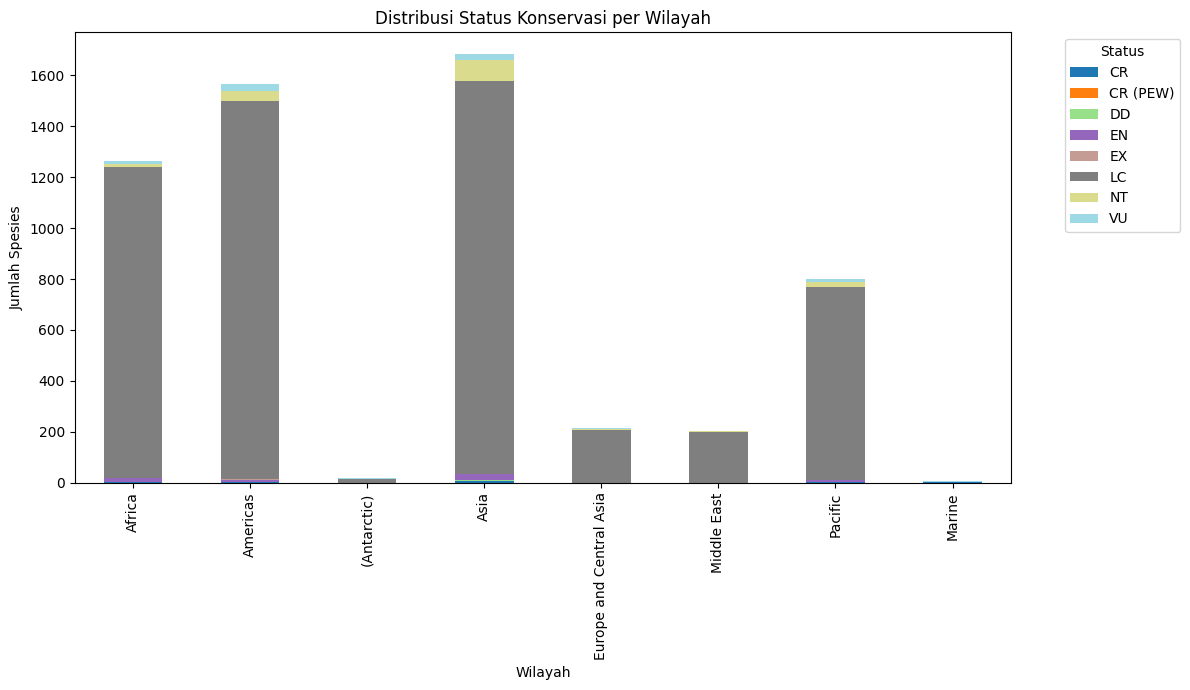

In [8]:
conservation_df.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Distribusi Status Konservasi per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Spesies')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

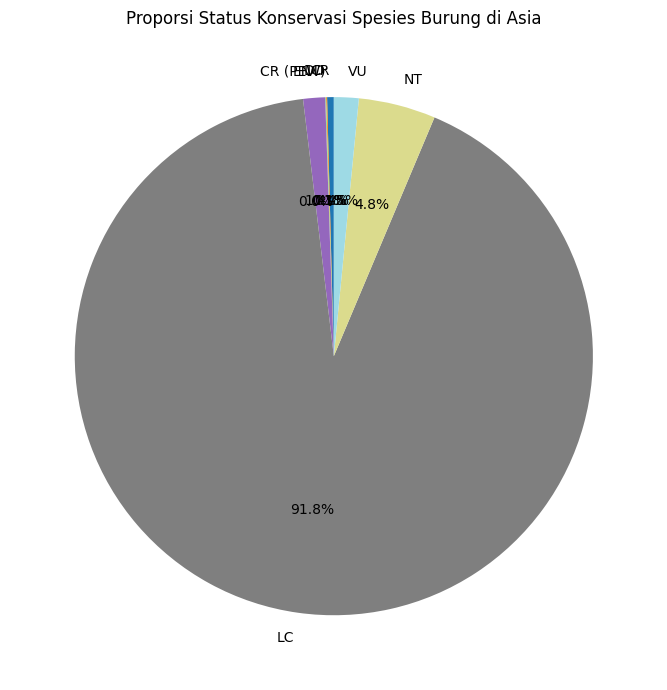

In [9]:
# Pie chart untuk Asia
conservation_df.loc['Asia'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(7,7),
    colormap='tab20'
)
plt.title('Proporsi Status Konservasi Spesies Burung di Asia')
plt.ylabel('')
plt.tight_layout()
plt.show()

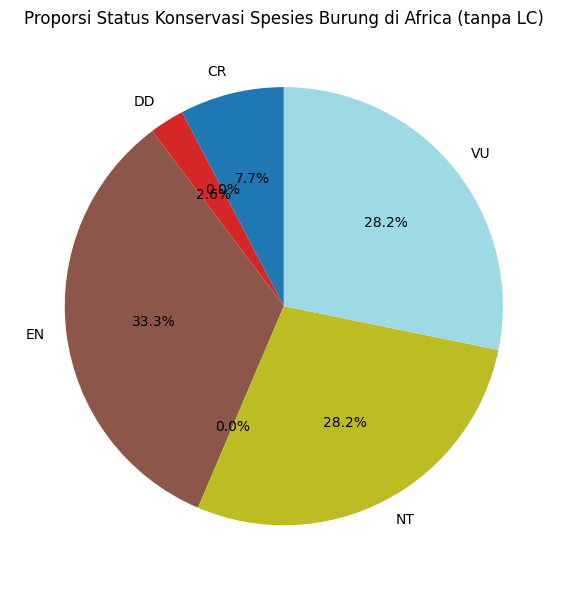

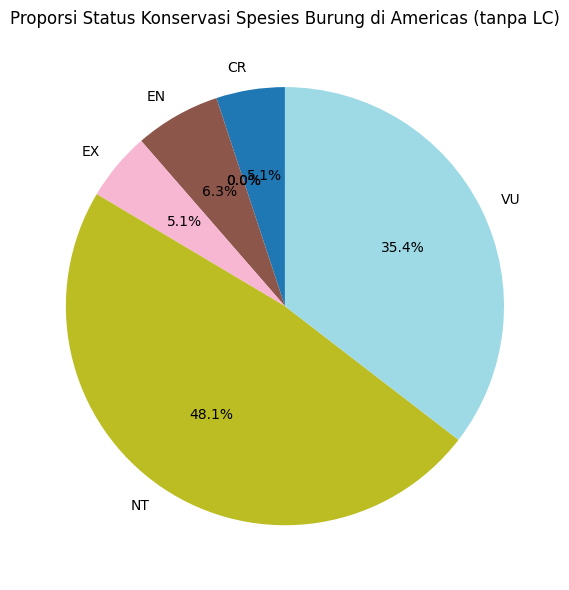

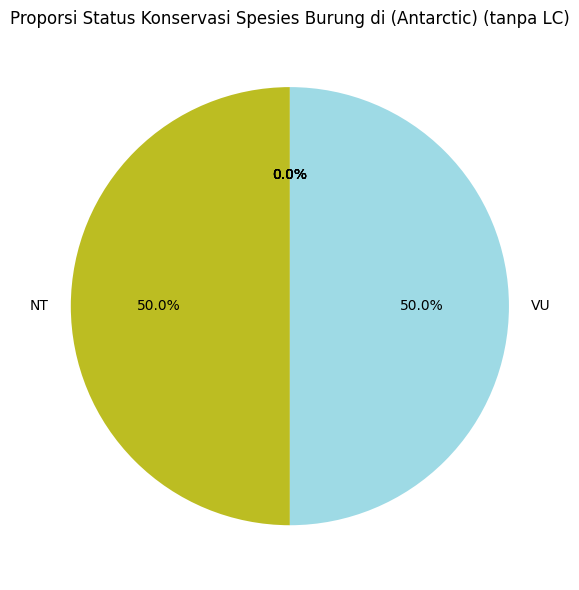

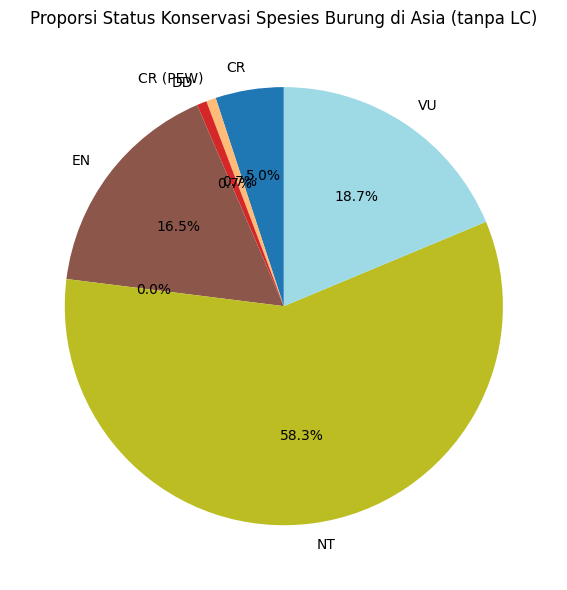

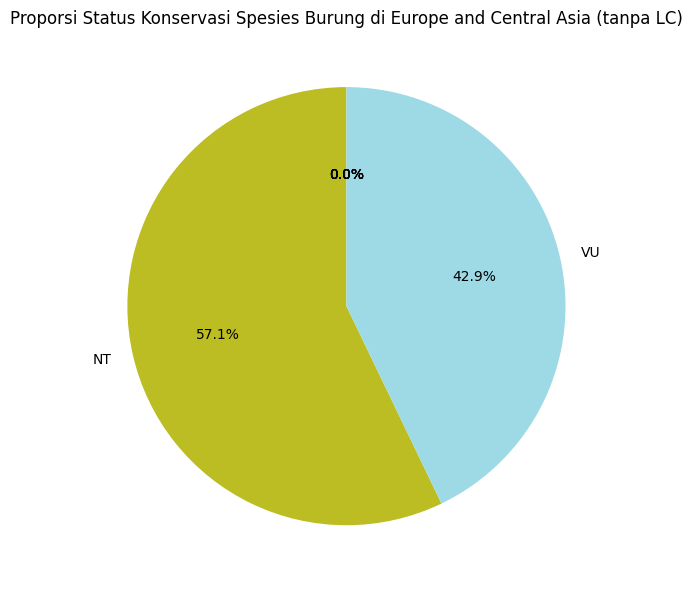

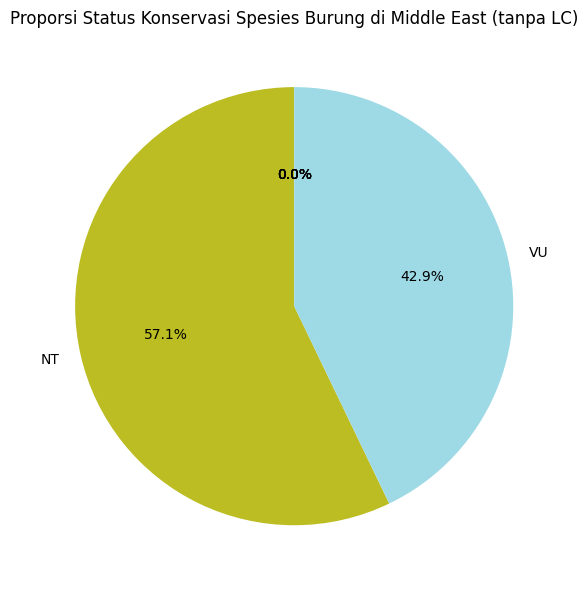

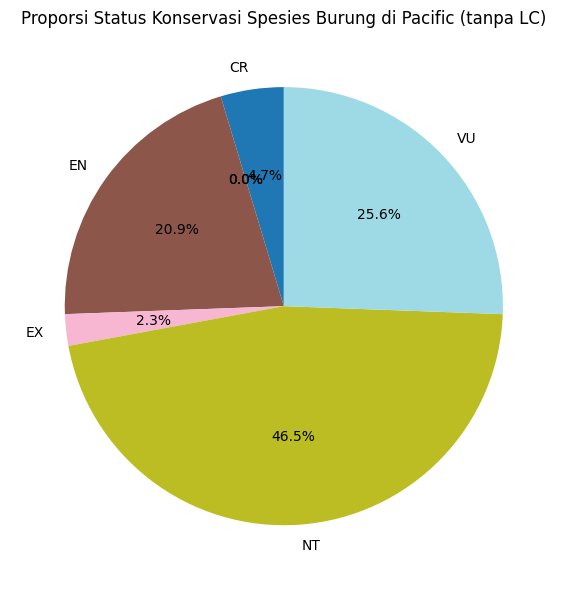

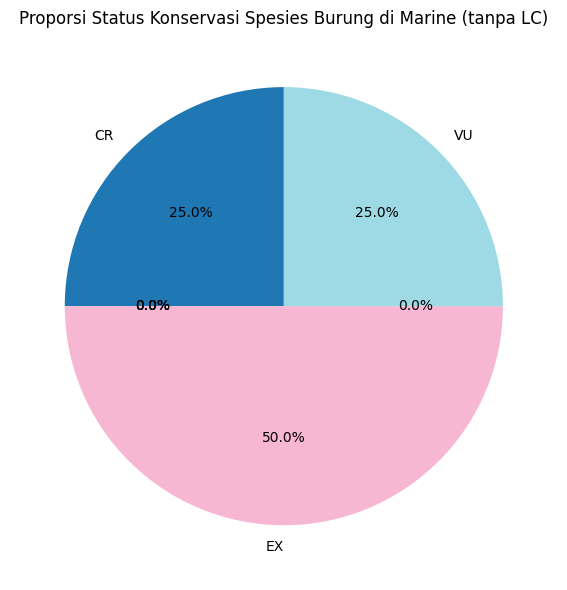

In [10]:
for region in regions:
    # Ambil data tanpa kategori LC
    data = conservation_df.loc[region].drop('LC', errors='ignore')
    # Hanya tampilkan jika ada data selain LC
    if data.sum() > 0:
        data.plot(
            kind='pie',
            autopct='%1.1f%%',
            startangle=90,
            figsize=(6,6),
            colormap='tab20'
        )
        plt.title(f'Proporsi Status Konservasi Spesies Burung di {region} (tanpa LC)')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

## 3. Perbandingan Wilayah dengan Jumlah Spesies Terancam Tertinggi

Kategori yang termasuk "terancam" adalah 
1. CR (Critically Endangered)
2. EN (Endangered)
3. VU (Vulnerable)

In [11]:
regions = ['Africa', 'Americas', '(Antarctic)', 'Asia', 'Europe and Central Asia', 'Middle East', 'Pacific', 'Marine']
threatened_categories = ['CR', 'EN', 'VU']

In [12]:
threatened_df = df[df['2024.2 IUCN Red List category'].isin(threatened_categories)]

# Hitung jumlah spesies terancam di setiap wilayah
threatened_per_region = {
    region: threatened_df[region].str.lower().eq('y').sum()
    for region in regions
}

# Ubah ke DataFrame dan urutkan
threatened_ranking = pd.DataFrame.from_dict(threatened_per_region, orient='index', columns=['Threatened Species Count'])
threatened_ranking = threatened_ranking.sort_values('Threatened Species Count', ascending=False)

print("Ranking wilayah berdasarkan jumlah spesies terancam (CR, EN, VU):")
print(threatened_ranking)

Ranking wilayah berdasarkan jumlah spesies terancam (CR, EN, VU):
                         Threatened Species Count
Asia                                           56
Americas                                       37
Africa                                         27
Pacific                                        22
Europe and Central Asia                         3
Middle East                                     3
(Antarctic)                                     2
Marine                                          2


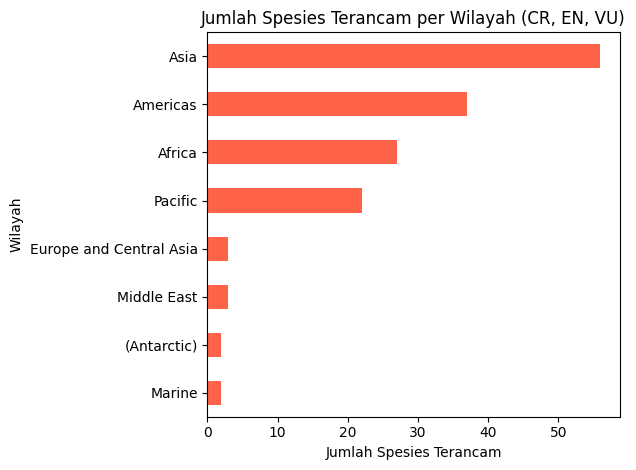

In [13]:
threatened_ranking.plot(kind='barh', legend=False, color='tomato')
plt.title("Jumlah Spesies Terancam per Wilayah (CR, EN, VU)")
plt.xlabel("Jumlah Spesies Terancam")
plt.ylabel("Wilayah")
plt.gca().invert_yaxis()  # Wilayah dengan jumlah terbanyak di atas
plt.tight_layout()
plt.show()

## 4. Rasio Kepunahan per Wilayah + Spesies Terdampak

In [14]:
# Hitung total spesies per wilayah
total_species = {
    region: df[region].str.lower().eq('y').sum()
    for region in regions
}

# Hitung jumlah spesies terancam (CR, EN, VU) per wilayah
threatened_species = {
    region: threatened_df[region].str.lower().eq('y').sum()
    for region in regions
}

# Gabungkan dan hitung rasio
risk_df = pd.DataFrame({
    'Total Species': total_species,
    'Threatened Species': threatened_species
})

risk_df['Threat Rate (%)'] = (risk_df['Threatened Species'] / risk_df['Total Species']) * 100
risk_df = risk_df.sort_values('Threat Rate (%)', ascending=False)

print("Rasio Spesies Terancam per Wilayah:")
print(risk_df)


Rasio Spesies Terancam per Wilayah:
                         Total Species  Threatened Species  Threat Rate (%)
Marine                               5                   2        40.000000
(Antarctic)                         17                   2        11.764706
Asia                              1685                  56         3.323442
Pacific                            800                  22         2.750000
Americas                          1565                  37         2.364217
Africa                            1263                  27         2.137767
Middle East                        204                   3         1.470588
Europe and Central Asia            215                   3         1.395349


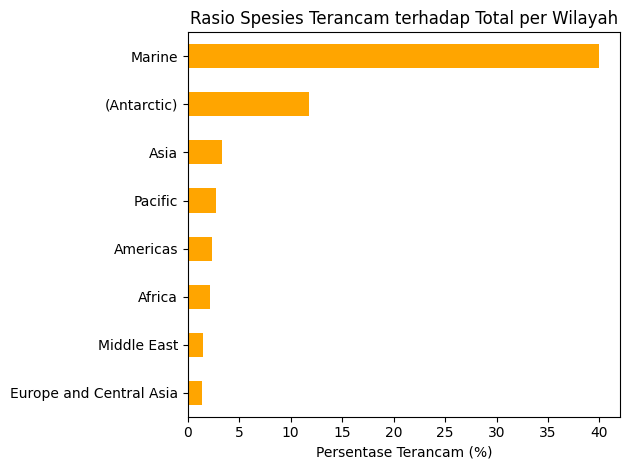

In [15]:
risk_df['Threat Rate (%)'].sort_values().plot(kind='barh', color='orange')
plt.title("Rasio Spesies Terancam terhadap Total per Wilayah")
plt.xlabel("Persentase Terancam (%)")
plt.tight_layout()
plt.show()


In [16]:
# Buat urutan status konservasi untuk pengurutan
threat_rank = {'CR': 1, 'EN': 2, 'VU': 3}

# Tambahkan kolom urutan ancaman
threatened_df = threatened_df.copy()
threatened_df['threat_level'] = threatened_df['2024.2 IUCN Red List category'].map(threat_rank)

# Tampilkan 5 spesies paling terancam per wilayah
top5_per_region = {}

threatened_df = threatened_df.copy()
threatened_df['threat_level'] = threatened_df['2024.2 IUCN Red List category'].map(threat_rank)

top5_per_region = {}
for region in regions:
    region_df = threatened_df[threatened_df[region].str.lower() == 'y']
    top5 = region_df.sort_values('threat_level').head(5)
    top5_per_region[region] = top5[['2024 Scientific name', '2024 Common name', '2024.2 IUCN Red List category']]

# Tampilkan hanya beberapa wilayah agar output tidak terpotong
for region in regions:
    print(f"\n🔹 Top 5 Terancam di {region}:")
    display(top5_per_region[region])
# ...existing code...



🔹 Top 5 Terancam di Africa:


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
4850,Rowettia goughensis,Gough Island Finch,CR
106,Pternistis ochropectus,Djibouti Spurfowl,CR
827,Spheniscus demersus,African Penguin,CR
3418,Hirundo atrocaerulea,Blue Swallow,EN
2800,Laniarius amboimensis,Gabela Bushshrike,EN



🔹 Top 5 Terancam di Americas:


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
43,Crax pinima,Belem Curassow,CR
272,Columbina cyanopis,Blue-eyed Ground Dove,CR
275,Paraclaravis geoffroyi,Purple-winged Ground Dove,CR
4680,Atlapetes blancae,Antioquia Brushfinch,CR
1138,Buteogallus coronatus,Crowned Solitary Eagle,EN



🔹 Top 5 Terancam di (Antarctic):


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
828,Diomedea exulans,Snowy Albatross,VU
944,Calidris fuscicollis,White-rumped Sandpiper,VU



🔹 Top 5 Terancam di Asia:


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
4064,Cyornis banyumas,Javan Blue Flycatcher,CR
4059,Cyornis ruckii,Rück's Blue Flycatcher,CR
3838,Liocichla bugunorum,Bugun Liocichla,CR
82,Perdicula manipurensis,Manipur Bush-quail,CR
178,Asarcornis scutulata,White-winged Duck,CR



🔹 Top 5 Terancam di Europe and Central Asia:


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
890,Pluvialis squatarola,Grey Plover,VU
934,Calidris falcinellus,Broad-billed Sandpiper,VU
936,Calidris ferruginea,Curlew Sandpiper,VU



🔹 Top 5 Terancam di Middle East:


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
890,Pluvialis squatarola,Grey Plover,VU
934,Calidris falcinellus,Broad-billed Sandpiper,VU
936,Calidris ferruginea,Curlew Sandpiper,VU



🔹 Top 5 Terancam di Pacific:


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
289,Pampusana erythroptera,Polynesian Ground Dove,CR
1293,Todiramphus gambieri,Tuamotu Kingfisher,CR
287,Pampusana kubaryi,Caroline Ground Dove,EN
2904,Metabolus rugensis,Chuuk Monarch,EN
2442,Gymnomyza samoensis,Mao,EN



🔹 Top 5 Terancam di Marine:


,2024 Scientific name,2024 Common name,2024.2 IUCN Red List category
827,Spheniscus demersus,African Penguin,CR
828,Diomedea exulans,Snowy Albatross,VU


In [17]:
# Inisialisasi DataFrame hanya dengan kolom Evenness_E
diversity_results = pd.DataFrame(index=regions, columns=['Evenness_E'])

for region in regions:
    # Filter DataFrame untuk spesies yang ada di wilayah ini ('y')
    region_species_df = df[df[region].str.lower() == 'y']

    # Hitung jumlah spesies untuk setiap kategori IUCN di wilayah ini
    category_counts = region_species_df['2024.2 IUCN Red List category'].value_counts()

    # Hanya pertimbangkan kategori yang memiliki setidaknya satu spesies
    category_counts = category_counts[category_counts > 0]

    if not category_counts.empty:
        # Hitung pi (proporsi)
        pi = category_counts / category_counts.sum()

        # Hitung Indeks Shannon-Wiener (H') - Masih diperlukan untuk perhitungan Evenness_E
        shannon_h = -np.sum(pi * np.log(pi))

        # Hitung S (jumlah kategori/status unik)
        S = len(category_counts)

        # Hitung Evenness Index (E)
        if S > 1: # Hindari log(1) yang akan menghasilkan 0
            evenness_e = shannon_h / np.log(S)
        else:
            evenness_e = 0.0 # Jika hanya ada 1 kategori, evenness adalah 0

        diversity_results.loc[region, 'Evenness_E'] = evenness_e
    else:
        diversity_results.loc[region, 'Evenness_E'] = 0.0

print(diversity_results)

                        Evenness_E
Africa                    0.100533
Americas                  0.145287
(Antarctic)               0.645076
Asia                      0.195009
Europe and Central Asia   0.150881
Middle East               0.157348
Pacific                   0.154742
Marine                    0.960964


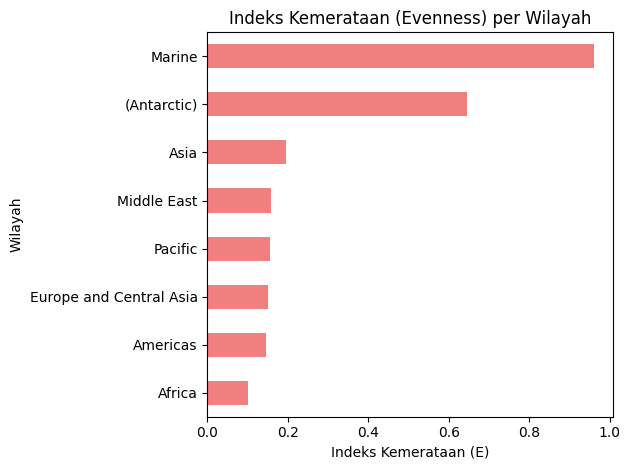

In [18]:
# Visualisasi Indeks Kemerataan
diversity_results['Evenness_E'].sort_values().plot(kind='barh', color='lightcoral')
plt.title('Indeks Kemerataan (Evenness) per Wilayah')
plt.xlabel('Indeks Kemerataan (E)')
plt.ylabel('Wilayah')
plt.tight_layout()
plt.show()